In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np
from sklearn import metrics
import os
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
HP = pd.read_csv("C:/Users/HP/Downloads/Holiday_Package.csv")

In [3]:
HP.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
HP.describe(include='all')

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,no,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,471,NaN,NaN,NaN,NaN,NaN,656
mean,436.500000,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,251.869014,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,1.000000,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,218.750000,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,436.500000,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,654.250000,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [5]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [6]:
HP.shape

(872, 8)

In [7]:
HP.duplicated().sum()

0

In [8]:
HP.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
HP.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [10]:
HP.shape

(872, 7)

In [11]:
HP.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [12]:
HP.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [13]:
HP.Salary.value_counts()

46195     2
33357     2
39460     2
36976     2
40270     2
         ..
38352     1
119644    1
96072     1
115431    1
74659     1
Name: Salary, Length: 864, dtype: int64

In [14]:
HP.age.value_counts().sort_index(ascending=False)

62     3
61     8
60    10
59    14
58    16
57    18
56    18
55    17
54    14
53    10
52    13
51    22
50    21
49    23
48    20
47    26
46    24
45    23
44    35
43    21
42    24
41    26
40    29
39    25
38    28
37    21
36    28
35    31
34    32
33    30
32    27
31    32
30    19
29    19
28    29
27    19
26    24
25    17
24    16
23    11
22     9
21    12
20     8
Name: age, dtype: int64

In [15]:
HP.groupby(['Salary']).Salary.value_counts()

Salary  Salary
1322    1322      1
10551   10551     1
10741   10741     1
12070   12070     1
12578   12578     1
                 ..
165895  165895    1
208561  208561    1
215675  215675    1
216630  216630    1
236961  236961    1
Name: Salary, Length: 864, dtype: int64

In [16]:
HP.no_young_children.value_counts().sort_index(ascending=False)

3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64

In [17]:
HP.no_older_children.value_counts().sort_index(ascending=False)

6      2
5      2
4     14
3     55
2    208
1    198
0    393
Name: no_older_children, dtype: int64

In [18]:
HP.educ.value_counts().sort_index(ascending=False)

21      1
19      2
18      1
17      3
16     10
15     15
14     25
13     43
12    124
11    100
10     90
9     114
8     157
7      31
6      21
5      67
4      50
3      11
2       6
1       1
Name: educ, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


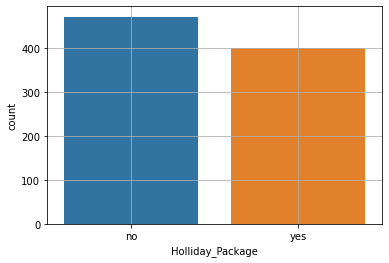

In [19]:
sns.countplot(HP.Holliday_Package)
plt.grid()
plt.show()

In [20]:
HP.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


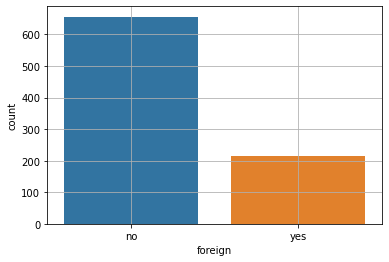

In [21]:
sns.countplot(HP.foreign)
plt.grid()
plt.show()

In [22]:
HP.foreign.value_counts(normalize=True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Count'>

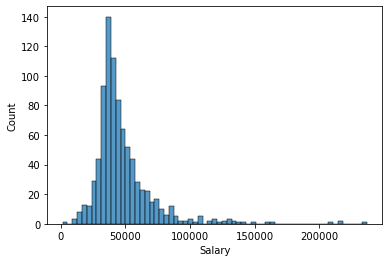

In [23]:
sns.histplot(HP['Salary'])

<AxesSubplot:xlabel='no_older_children', ylabel='Count'>

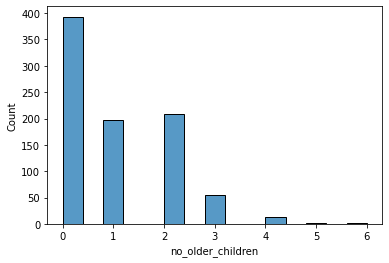

In [24]:
sns.histplot(HP['no_older_children'])

<AxesSubplot:xlabel='age', ylabel='Count'>

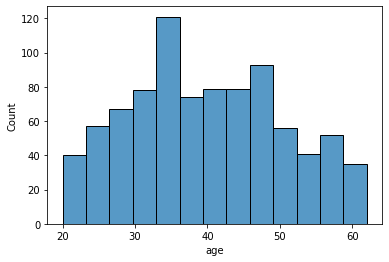

In [25]:
sns.histplot(HP['age'])

<AxesSubplot:xlabel='educ', ylabel='Count'>

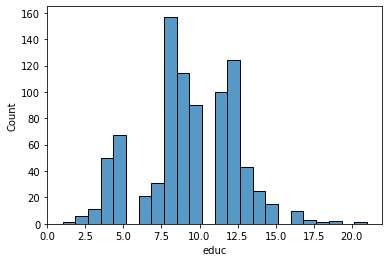

In [26]:
sns.histplot(HP['educ'])

<AxesSubplot:xlabel='no_young_children', ylabel='Count'>

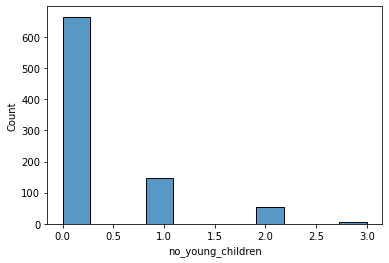

In [27]:
sns.histplot(HP['no_young_children'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Shape before Outliers Treatment (872, 7)


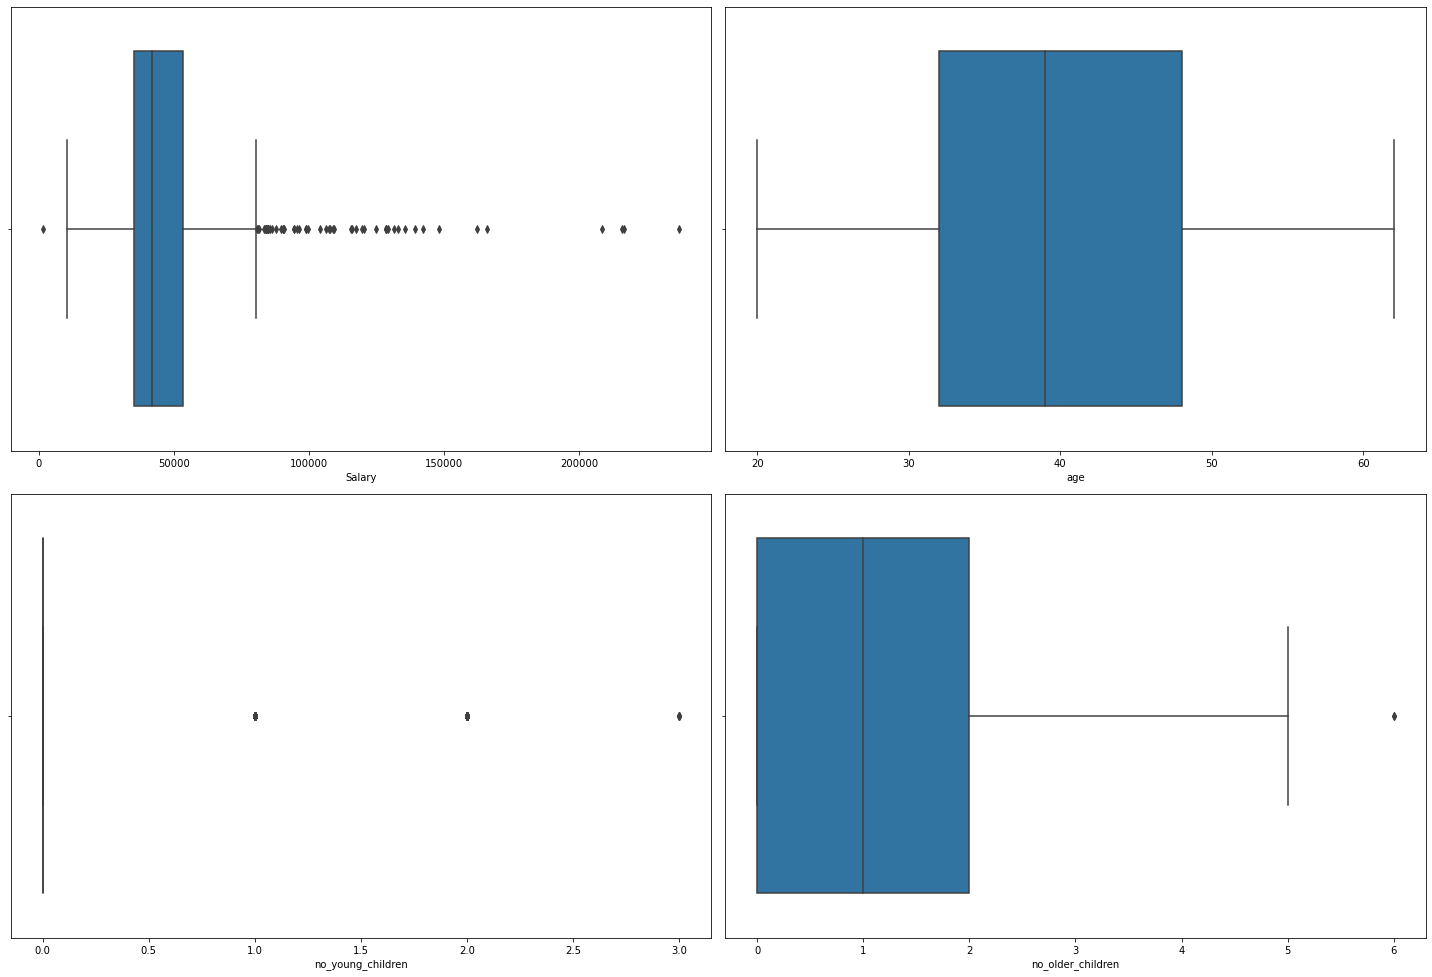

In [28]:
HP_plot=HP[['Salary', 'age', 'no_young_children', 'no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(HP_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(HP_plot[HP_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',HP.shape)

In [34]:
def remove_outlier(HP):
    sorted(HP)
    Q1,Q3=np.percentile(HP,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
upper_range

NameError: name 'upper_range' is not defined

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Shape After Outliers Treatment (872, 7)


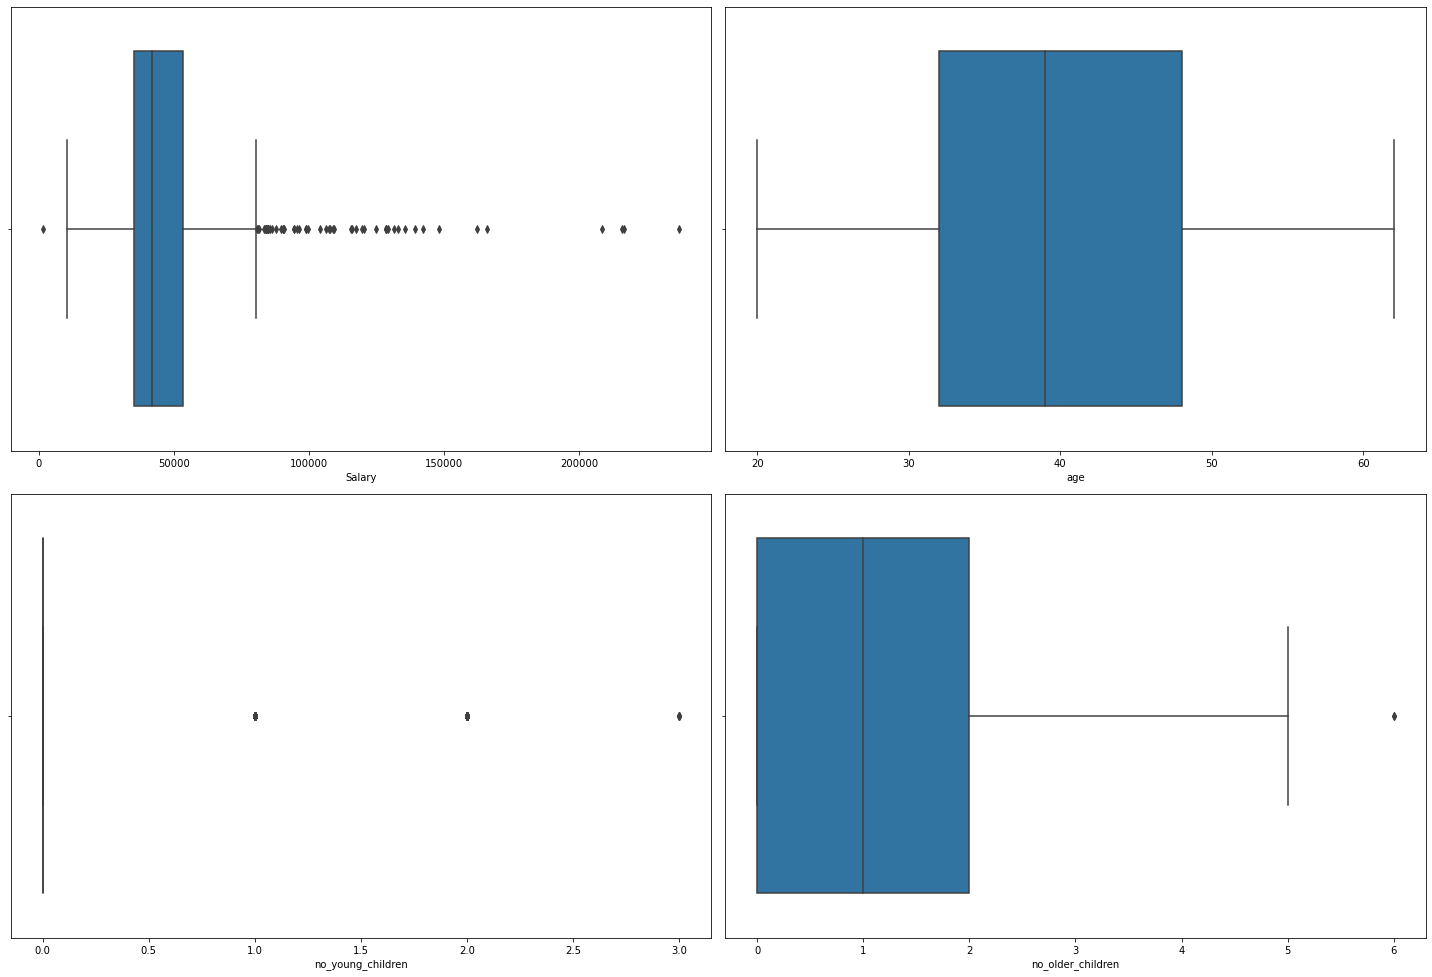

In [36]:
HP_plot=HP[['Salary', 'age', 'no_young_children', 'no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(HP_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(HP_plot[HP_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',HP.shape)

In [37]:
HP.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

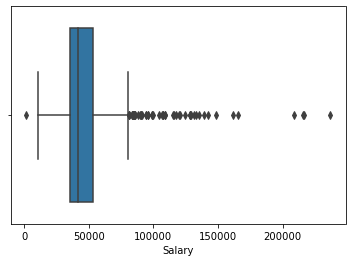

In [39]:
sns.boxplot(HP['Salary'])

In [40]:
### Retrying the functions with new approach

In [41]:
df2 = pd.read_csv("C:/Users/HP/Downloads/Holiday_Package.csv")

In [42]:
df2_bkp = df2.copy()


In [43]:
df2.head()


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [44]:
df2.tail()


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


# Exploratory Data Analysis

## Checking the datatype/information


In [45]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


### Checking for duplicates


In [46]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df2[dups]

Number of duplicate rows = 0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [47]:
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    numeric_col_names=df.select_dtypes(exclude='object').columns
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))

    return CV, Skew, IQR,  UR, LR 

In [48]:
def calc_rows(Col_list,no_of_graph_row=4):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

### Checking for summary

In [49]:
df2_summ=pd.DataFrame(df2.describe().round(4))

### Checking for missing values

In [50]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) 
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False) 
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data # return the dataframe
missing_check(df2)

,Total,Percent
Unnamed: 0,0,0.0
Holliday_Package,0,0.0
Salary,0,0.0
age,0,0.0
educ,0,0.0
no_young_children,0,0.0
no_older_children,0,0.0
foreign,0,0.0


In [51]:
##We can confirm that there are no NULL values in the data

### Check for Outliers (Which all variables have an outlier?)


C:\Users\HP\AppData\Local\Temp/ipykernel_10920/1067814055.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,box_plot_no)
C:\Users\HP\AppData\Local\Temp/ipykernel_10920/1067814055.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,box_plot_no)
C:\Users\HP\AppData\Local\Temp/ipykernel_10920/1067814055.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,box_plot_no)
C:\Users\HP\AppData\Local\Temp/ipykernel_10920/1067814055.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated si

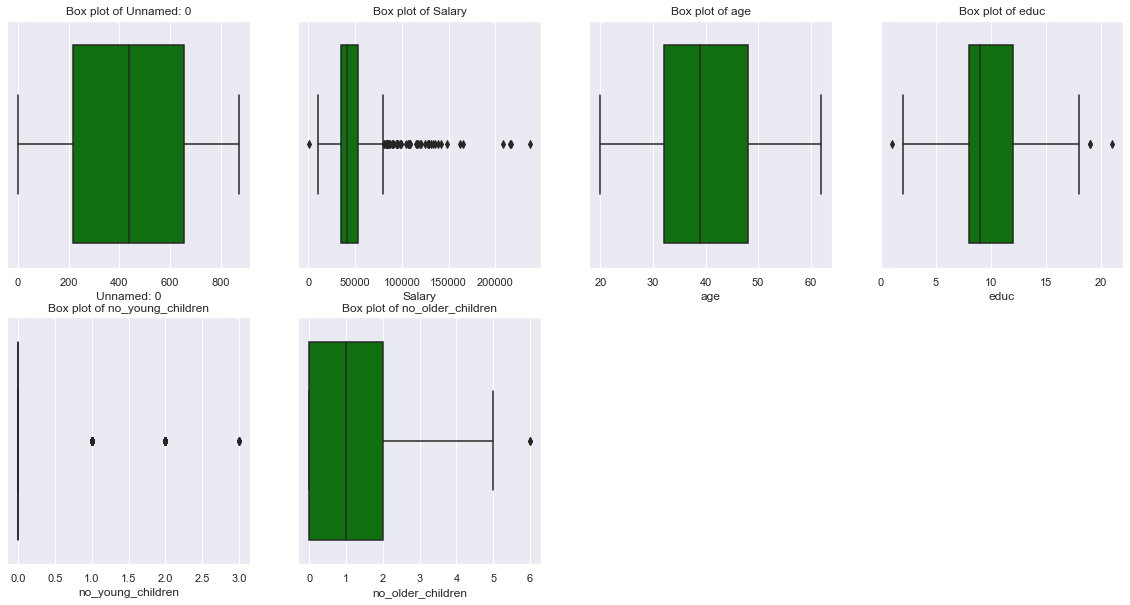

In [52]:
# Checking for Outliers
numeric_col_names=df2.select_dtypes(exclude='object').columns
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
sns.set(font_scale=1)
plt.figure(figsize= (20,10))
box_plot_no=1
for col in df2.columns :
    if (col in numeric_col_names):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df2 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 

### Plot the Histrograms

C:\Users\HP\AppData\Local\Temp/ipykernel_10920/3522671414.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,distplot_no)
C:\Users\HP\AppData\Local\Temp/ipykernel_10920/3522671414.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,distplot_no)
C:\Users\HP\AppData\Local\Temp/ipykernel_10920/3522671414.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,distplot_no)
C:\Users\HP\AppData\Local\Temp/ipykernel_10920/3522671414.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated si

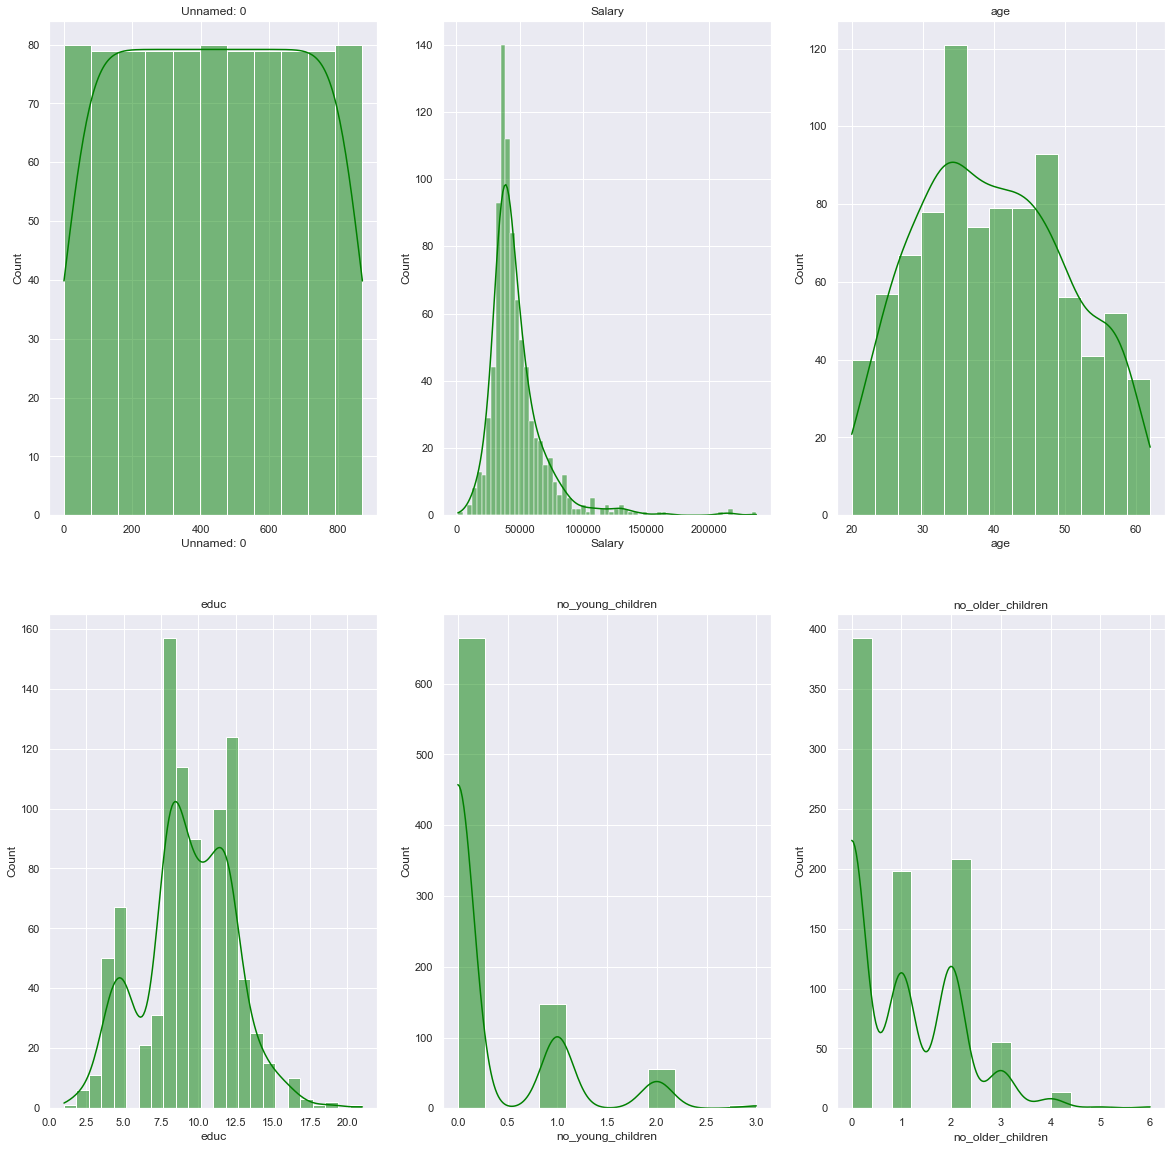

In [53]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in df2.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df2[col] ,color='green',kde=True).set(title =distplot_title)
        distplot_no = distplot_no + 1 

### Correcting Spelling error in Column names

In [54]:
df2.columns


Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [55]:
df2.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True)

In [56]:
df2.rename(columns={'Holiday_Package':'HolidayPackage','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children','foreign':'Foreign'},inplace=True)

In [57]:
df2.columns

Index(['Unnamed: 0', 'HolidayPackage', 'Salary', 'Age', 'Educ',
       'No_young_children', 'No_older_children', 'Foreign'],
      dtype='object')

### Bi-variate, and multivariate analysis

### Checking the unique values for categorical variables


In [58]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column,': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

HolidayPackage :  2
yes    401
no     471
Name: HolidayPackage, dtype: int64


Foreign :  2
yes    216
no     656
Name: Foreign, dtype: int64




## Swarm Plots


<AxesSubplot:xlabel='HolidayPackage', ylabel='Age'>

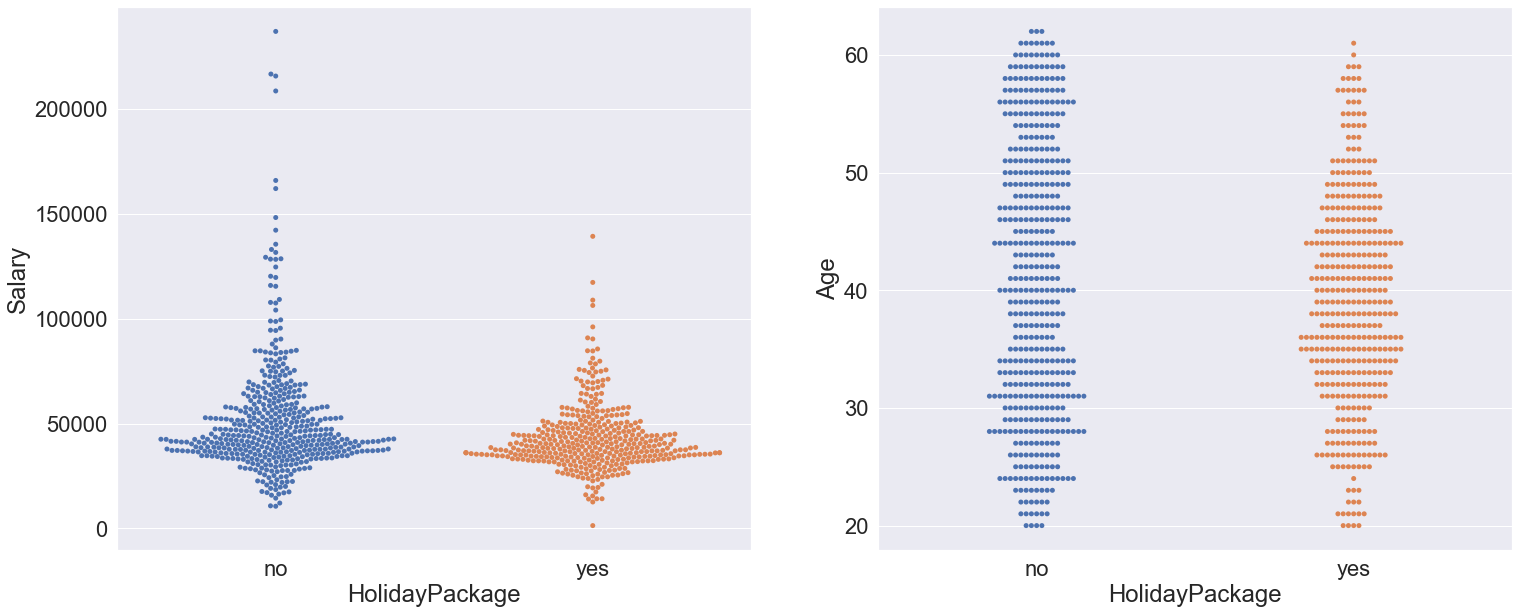

In [59]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=df2,x='HolidayPackage', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df2,x='HolidayPackage', y='Age')

#### We can see that as:- As Salary increases to the max value, employees count increases for the not opting for the holiday package. As Age increases beyond 50 level, less emplyees opt for the holiday package

<AxesSubplot:xlabel='Foreign', ylabel='count'>

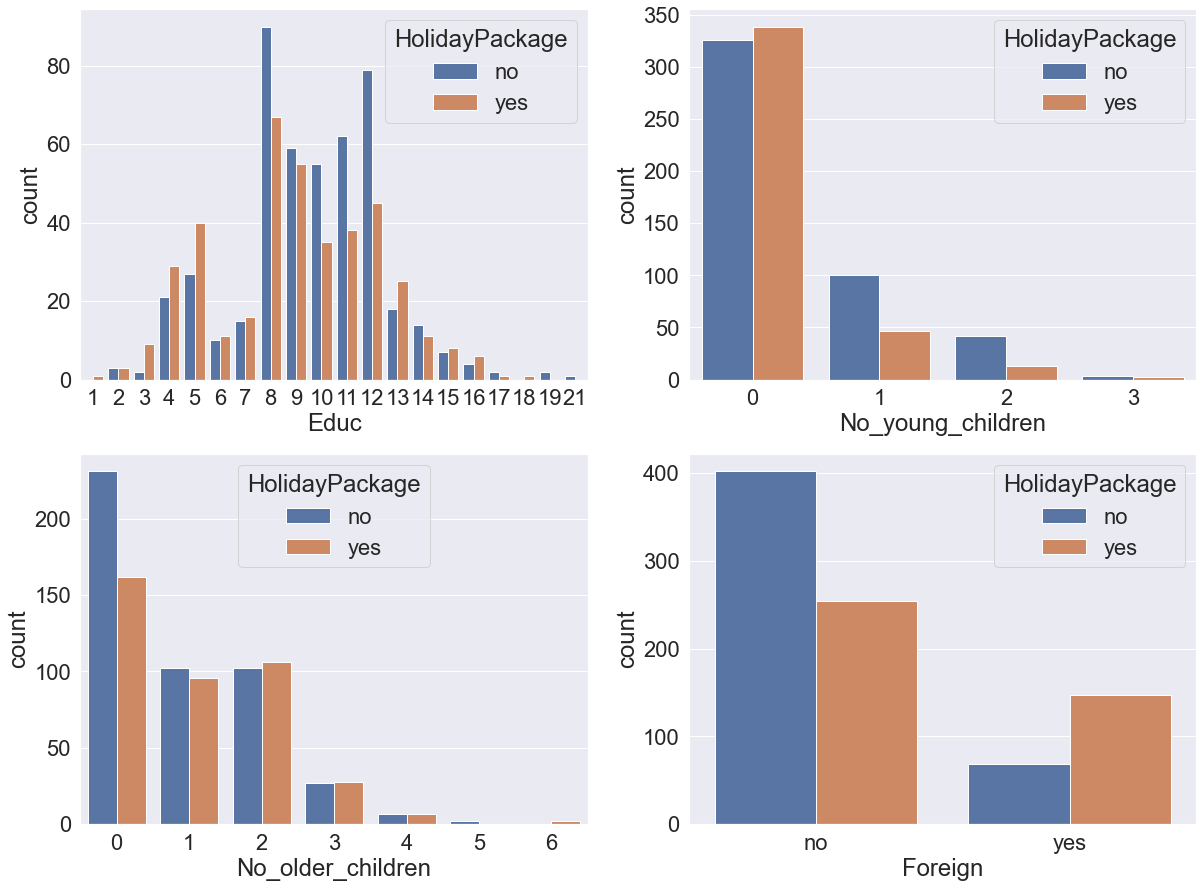

In [60]:
### Count plot
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df2,hue='HolidayPackage', x='Educ')
plt.subplot(2,2,2)
sns.countplot(data=df2,hue='HolidayPackage', x='No_young_children')
plt.subplot(2,2,3)
sns.countplot(data=df2,hue='HolidayPackage', x='No_older_children')
plt.subplot(2,2,4)
sns.countplot(data=df2,hue='HolidayPackage', x='Foreign')

### - More Employess opt for Tours if their education level is 3,4,5,6,7,13,14,15,16
### -  Employees dont opt for tours if they have young child
### - Older children count doesnt appearst to have much impact on tour opted by employees or not
### - Foreigner employees tends to opt more for the tour

In [61]:
pd.crosstab(df2['No_young_children'],df2['HolidayPackage'],margins=True)

HolidayPackage,no,yes,All
No_young_children,,,
0,326,339,665
1,100,47,147
2,42,13,55
3,3,2,5
All,471,401,872


### We can see that around 24% of employees have one or more young child. Out of these employees, 70% ((100+42+3)/(147+55+5)) are not opting for tours.

In [62]:
(100+42+3)/(147+55+5)

0.7004830917874396

In [63]:
pd.crosstab(df2['Foreign'],df2['HolidayPackage'],margins=True)


HolidayPackage,no,yes,All
Foreign,,,
no,402,254,656
yes,69,147,216
All,471,401,872


#### As per the data, we can say that 68% of foreign employees are opting for the tour packages.


## Correlation matrix

In [64]:
Cor=df2.corr().round(2)
Cor


,Unnamed: 0,Salary,Age,Educ,No_young_children,No_older_children
Unnamed: 0,1.00,-0.19,-0.10,-0.30,0.05,-0.03
Salary,-0.19,1.00,0.07,0.33,-0.03,0.11
Age,-0.10,0.07,1.00,-0.15,-0.52,-0.12
Educ,-0.30,0.33,-0.15,1.00,0.10,-0.04
No_young_children,0.05,-0.03,-0.52,0.10,1.00,-0.24
No_older_children,-0.03,0.11,-0.12,-0.04,-0.24,1.00


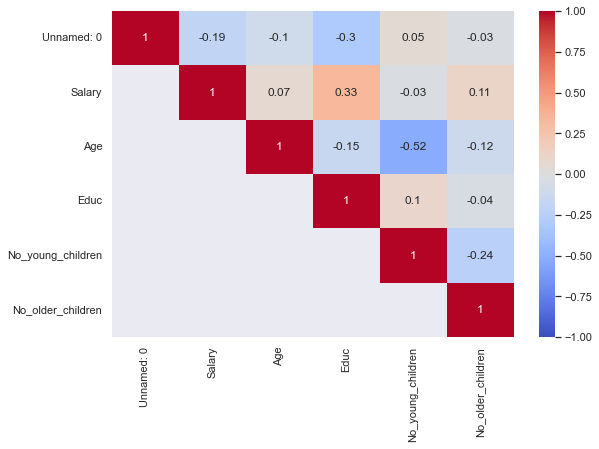

In [65]:
# plot the correlation coefficients as a heatmap
## Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

### We can see in heatmap & correlation matrix that
 
### Salary has correlation with educ.
### Age is negatively correlated with No_young_children

## Pairplot

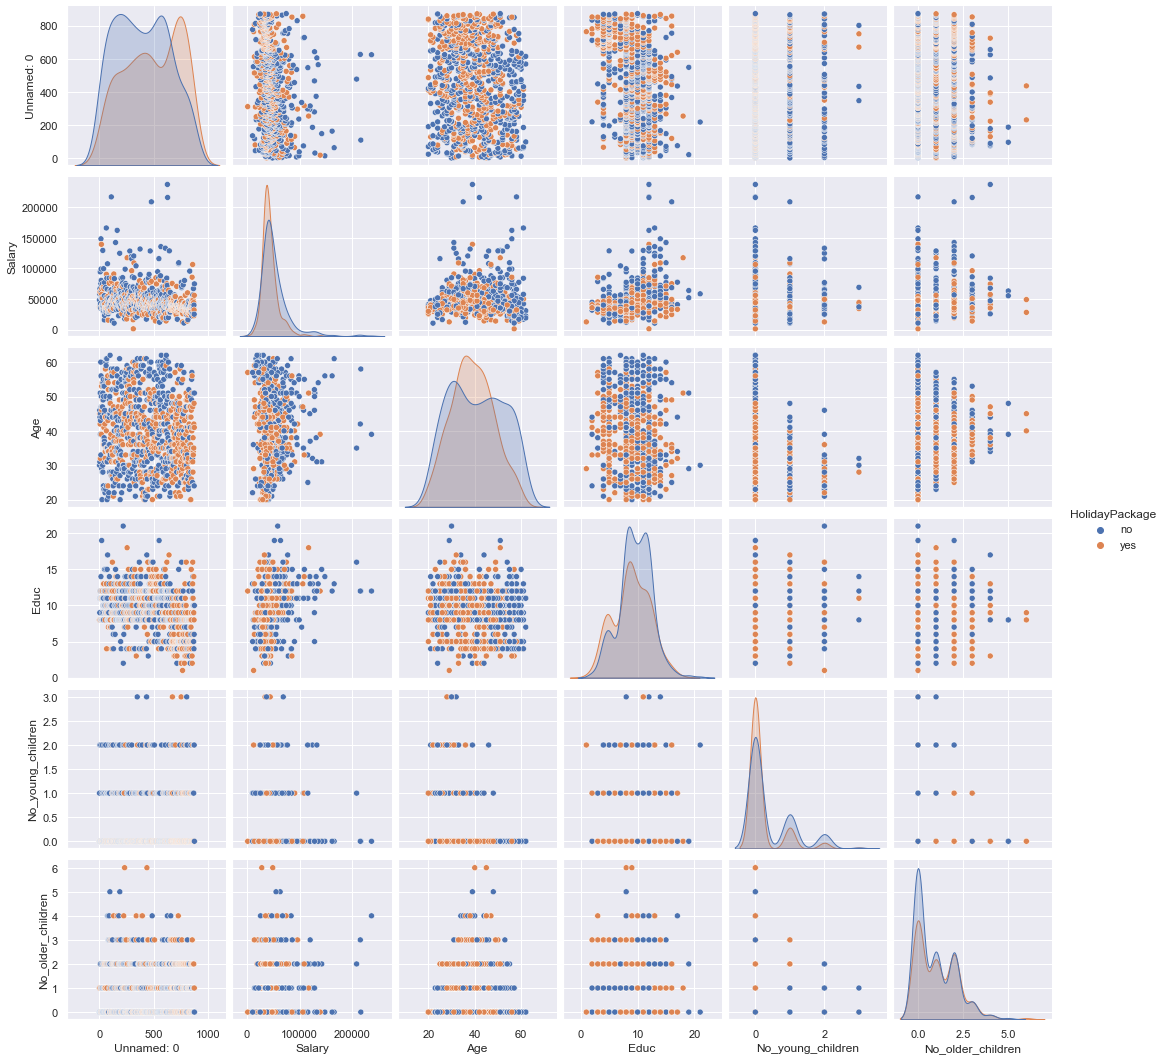

In [66]:
sns.pairplot(df2,hue='HolidayPackage',diag_kind='kde')

## As depicted in heat map of correlation matrix, we can see that no of young children negatively correlated with age.

## Salary is slightly correlated with Educ

## Outlier treatment (flooring and capping)


### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Scaling
#### Scaling is not required for the logistic regression model. Hence its not performed here

In [67]:
df2_bkp2=df2.copy()

#### Encoding object data to Numerical

In [68]:
df2.HolidayPackage.replace(['yes','no'],[1,0],inplace=True)
#df2.Foreign.replace(['yes','no'],[1,0],inplace=True)

In [69]:
df2.HolidayPackage.value_counts()

0    471
1    401
Name: HolidayPackage, dtype: int64

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   HolidayPackage     872 non-null    int64 
 2   Salary             872 non-null    int64 
 3   Age                872 non-null    int64 
 4   Educ               872 non-null    int64 
 5   No_young_children  872 non-null    int64 
 6   No_older_children  872 non-null    int64 
 7   Foreign            872 non-null    object
dtypes: int64(7), object(1)
memory usage: 54.6+ KB


In [71]:
df2 = pd.get_dummies(df2,drop_first=True)
df2.head()

,Unnamed: 0,HolidayPackage,Salary,Age,Educ,No_young_children,No_older_children,Foreign_yes
0,1,0,48412,30,8,1,1,0
1,2,1,37207,45,8,0,1,0
2,3,0,58022,46,9,0,0,0
3,4,0,66503,31,11,2,0,0
4,5,0,66734,44,12,0,2,0


In [72]:
df2.rename(columns={'Foreign_yes':'Foreign'},inplace=True)

In [73]:
df2.Foreign.value_counts()

0    656
1    216
Name: Foreign, dtype: int64

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         872 non-null    int64
 1   HolidayPackage     872 non-null    int64
 2   Salary             872 non-null    int64
 3   Age                872 non-null    int64
 4   Educ               872 non-null    int64
 5   No_young_children  872 non-null    int64
 6   No_older_children  872 non-null    int64
 7   Foreign            872 non-null    uint8
dtypes: int64(7), uint8(1)
memory usage: 48.7 KB


### Train-Test Split

In [75]:
# Copy all the predictor variables into X dataframe
#X = df2.drop(['HolidayPackage','Educ','No_older_children'], axis=1)
X = df2.drop(['HolidayPackage'], axis=1)
#X = df1[['carat','depth']]

# Copy target into the y dataframe. 
y = df2[['HolidayPackage']]

In [76]:
X.head()

,Unnamed: 0,Salary,Age,Educ,No_young_children,No_older_children,Foreign
0,1,48412,30,8,1,1,0
1,2,37207,45,8,0,1,0
2,3,58022,46,9,0,0,0
3,4,66503,31,11,2,0,0
4,5,66734,44,12,0,2,0


In [77]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [78]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df2.shape)

(610, 7)
(262, 7)
(610, 1)
(262, 1)
(872, 8)


In [79]:
y_train.value_counts(normalize=True)

HolidayPackage
0                 0.539344
1                 0.460656
dtype: float64

## Logistic Regression Model
### creating user define function so to run model multiple times for different grid search parameters

In [80]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [81]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

In [82]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   22.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [83]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs


In [84]:
ytest_predict_prob=model.predict_proba(X_test)

### Model Evaluation

In [88]:
# Accuracy - Training Data
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for training dataset',model.score(X_test, y_test))

Model score for training dataset 0.6655737704918033
Model score for training dataset 0.6679389312977099


In [89]:
best_model = grid_search.best_estimator_

NameError: name 'grid_search' is not defined

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.736
AUC for test dataset: 0.736


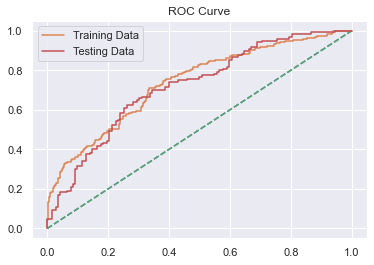

In [90]:
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [91]:
confusion_matrix(y_train, ytrain_predict)

array([[243,  86],
       [118, 163]], dtype=int64)

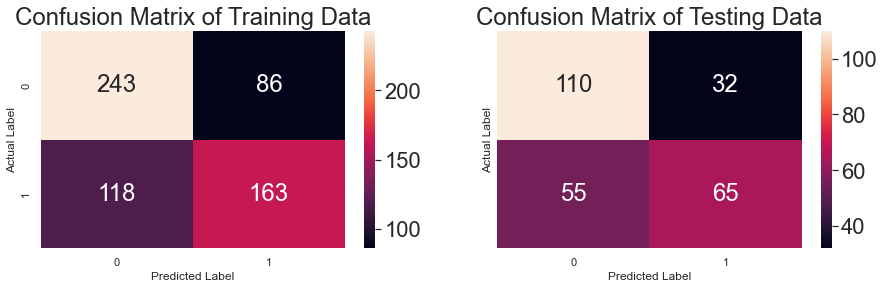

In [92]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

### Training Data and Test Data Classification Report Comparison

In [93]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.67      0.54      0.60       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262
 



### Applying GridSearchCV for Logistic Regression

In [94]:
grid={'penalty':['l2','none','l1'],   
      'solver':['lbfgs','liblinear'],   # 'newton-cg',
      'tol':[0.0001,0.00001]}

In [95]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [96]:
#grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv_value=3
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search


 Showing best parameters for the grid search

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.56      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       142
           1       0.68      0.53      0.59       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.60818925 0.60818925 0.60817315 0.64759007 0.60818925 0.60818925
        nan        nan        nan        nan 0.65251618 0.65088219]
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


In [97]:
best_model = grid_search.best_estimator_

In [98]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [99]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

### Model Evaluation

In [100]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for training dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.6639344262295082
Model score for training dataset 0.6679389312977099


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.734
AUC for test dataset: 0.734


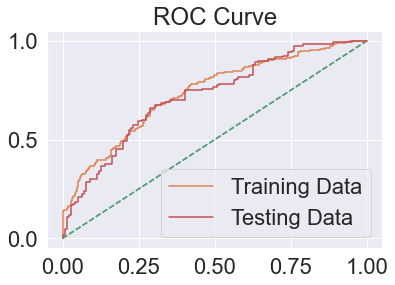

In [101]:
# predict probabilities
probs_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

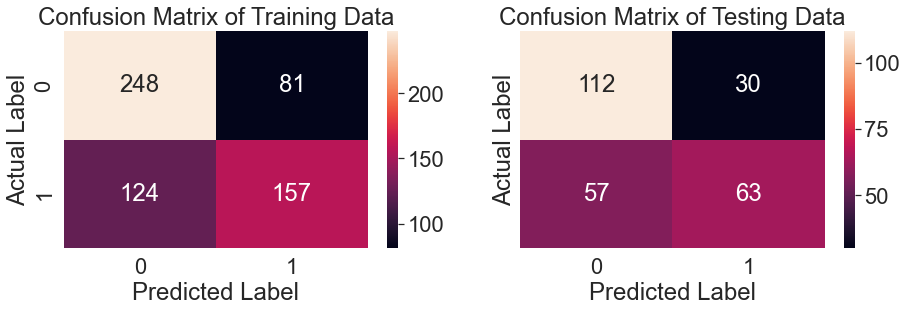

In [102]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

### Training Data and Test Data Classification Report Comparison


In [103]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.56      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.79      0.72       142
           1       0.68      0.53      0.59       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262
 



### Getting the equation

In [104]:
## Import the model
import statsmodels.formula.api as sm

In [105]:
df2=df2.drop('Unnamed: 0',axis=1)

In [106]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [107]:
A1 = 'HolidayPackage ~Salary+Age+Educ+No_young_children+No_older_children+Foreign'


In [108]:
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.1281
Time:                        09:54:04   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
Age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
Educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
No_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
No_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
Foreign               1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

####  We can see that the p value of No_older_children is the highest (.733) and it is greator than 0.05.

####  Hence it confirms that No_older_children attribute has no impact on dependent variable HolidayPackage

In [109]:
A1 = 'HolidayPackage ~Salary+Age+Educ+No_young_children+Foreign'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601574
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.1281
Time:                        09:54:38   Log-Likelihood:                -524.57
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.808e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2705      0.516      4.403      0.000       1.260       3.281
Salary            -1.831e-05   4.31e-06     -4.249      0.000   -2.68e-05   -9.86e-06
Age                  -0.0474      0.009     -5.511      0.000      -0.064      -0.031
Educ                  0.0399      0.029      1.367      0.172      -0.017       0.097
No_young_children    -1.3004      0.169     -7.711      0.000      -1.631      -0.970
Foreign               1.3210      0.200      6.599      0.000       0.929       1.713
=====================================================================================
"""

In [110]:
A1 = 'HolidayPackage ~Salary+Age+No_young_children+Foreign'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.1265
Time:                        09:54:51   Log-Likelihood:                -525.51
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 6.885e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6725      0.426      6.278      0.000       1.838       3.507
Salary            -1.664e-05   4.08e-06     -4.075      0.000   -2.46e-05   -8.64e-06
Age                  -0.0495      0.008     -5.843      0.000      -0.066      -0.033
No_young_children    -1.2946      0.169     -7.669      0.000      -1.625      -0.964
Foreign               1.2124      0.183      6.634      0.000       0.854       1.571
=====================================================================================
"""

#### Now all p values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable HolidayPackage.

#### Also we can see that coef value is highest for No_young_children followed by foreign, Age and salary

#### Salary coefficient value is very low i.e -00001932. So its impact is almost 0 on dependent variable

In [111]:
model_1.params

Intercept            2.672546
Salary              -0.000017
Age                 -0.049470
No_young_children   -1.294575
Foreign              1.212439
dtype: float64

In [112]:
for i,j in np.array(model_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.67) * Intercept + (-0.0) * Salary + (-0.05) * Age + (-1.29) * No_young_children + (1.21) * Foreign + 

## Logistics Regression Conclusion


# Train Data:

AUC: 73%
Accuracy: 66%
Precision: 66%
f1-Score: 61%
Recall: 57%

## Test Data:

AUC: 73%
Accuracy: 66%
Precision: 68%
f1-Score: 58%
Recall: 52%



## LDA Model

In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [114]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Prediction

In [115]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

## Training Data and Test Data Confusion Matrix Comparison


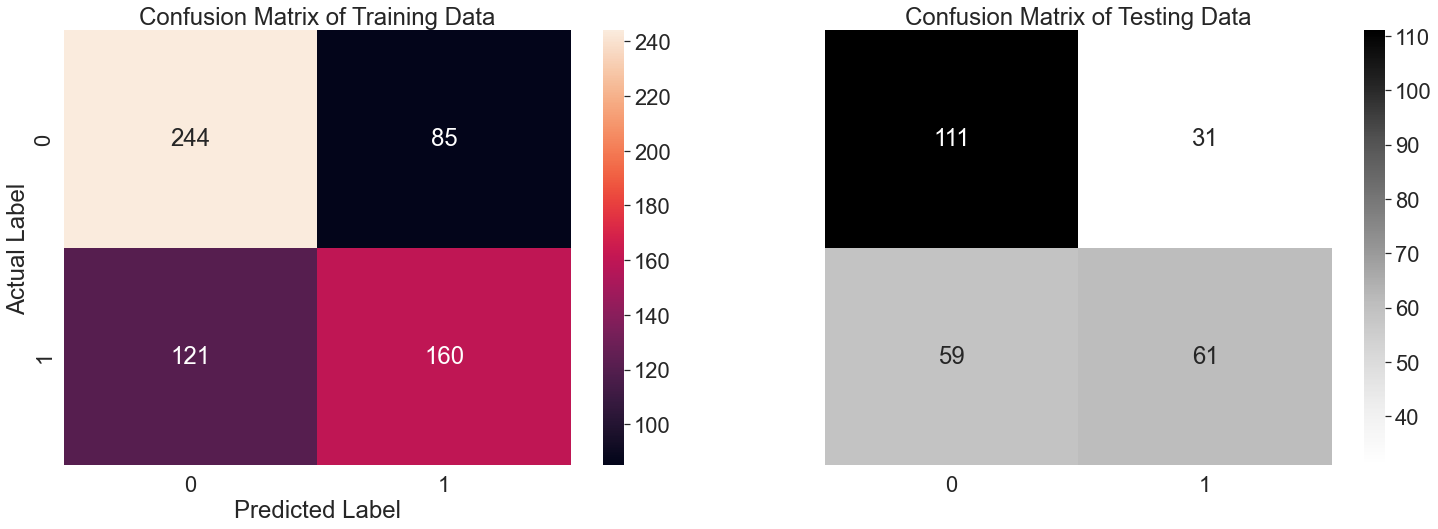

In [116]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label");

## Training Data and Test Data Classification Report Comparison


In [117]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.78      0.71       142
           1       0.66      0.51      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



## Probability prediction for the training and test data

In [118]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.734
AUC for the Test Data: 0.714


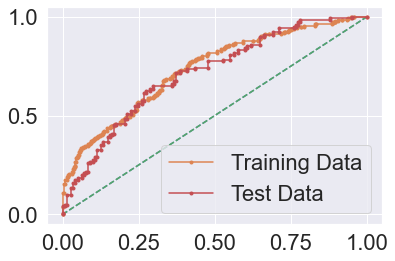

In [119]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## LDA Conclusion
### Train Data:

AUC: 73%
Accuracy: 66%
Precision: 65%
f1-Score: 61%
Recall: 57%

### Test Data:

AUC: 71%
Accuracy: 65%
Precision: 65%
f1-Score: 57%
Recall: 52%



In [120]:
df2.groupby(['HolidayPackage','No_young_children']).size()

HolidayPackage  No_young_children
0               0                    326
                1                    100
                2                     42
                3                      3
1               0                    339
                1                     47
                2                     13
                3                      2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

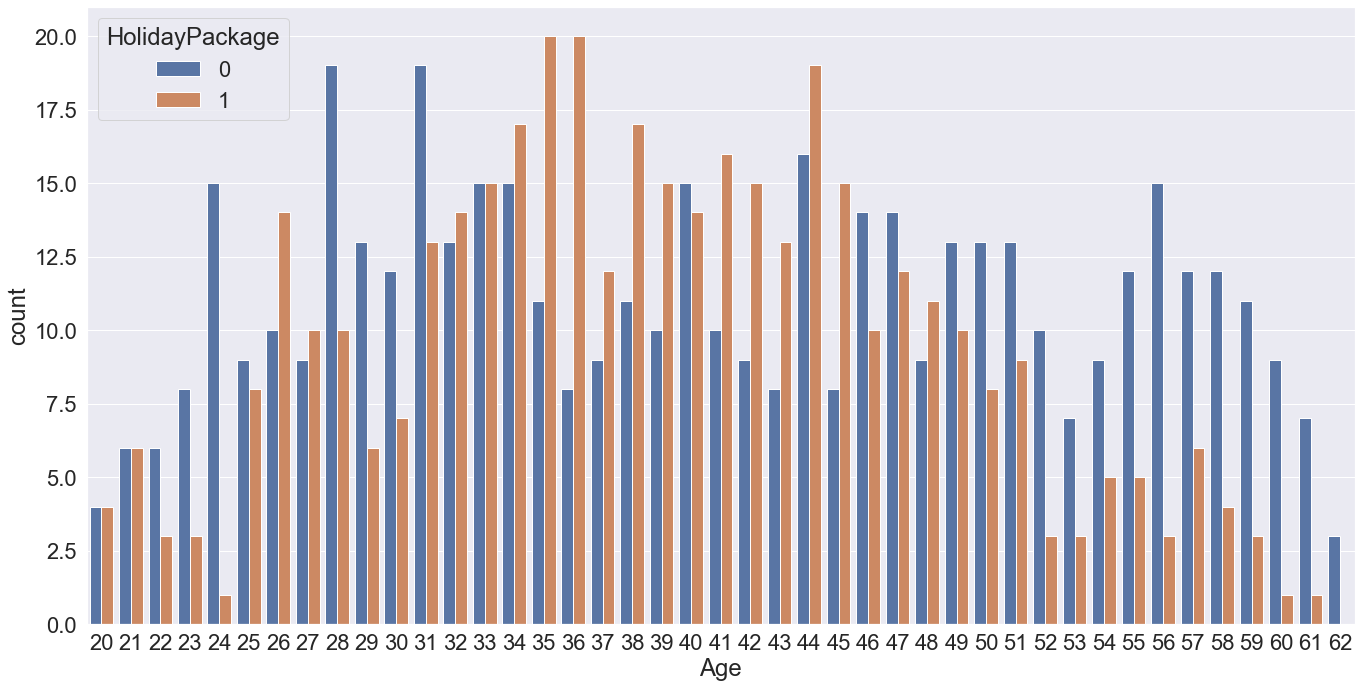

In [121]:
plt.figure(figsize=(50,25))
plt.subplot(2,2,1)
sns.countplot(data=df2,hue='HolidayPackage', x='Age')

<AxesSubplot:xlabel='No_young_children', ylabel='count'>

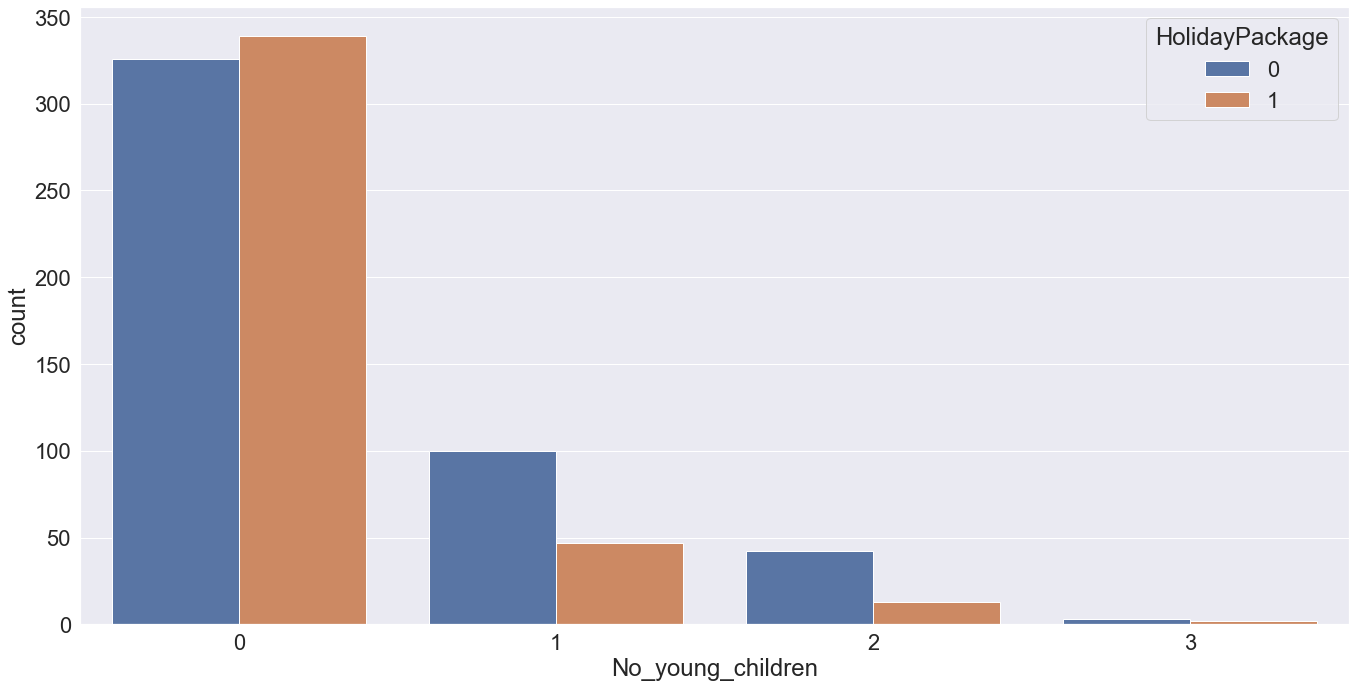

In [122]:
plt.figure(figsize=(50,25))
plt.subplot(2,2,1)
sns.countplot(data=df2,hue='HolidayPackage', x='No_young_children')